#Transfer Learning with TensorFlow Part 2: Fine-Tuning


##Creating helper function

importing the helper_function.py which has all the functions used previously


In [9]:
!wget https://raw.githubusercontent.com/krishnamenon215/Tensorflow/main/helper_functions.py

--2023-01-14 22:11:42--  https://raw.githubusercontent.com/krishnamenon215/Tensorflow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-14 22:11:42 (78.7 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [10]:
#Import helper function

from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

## Lets get some data

gona use the pretrained models in tf.keras.applications and apply them to our problem(reg food)

In [11]:
#Get 10% of training data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-01-14 22:11:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  24.0MB/s    in 7.8s    

2023-01-14 22:11:52 (20.7 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [12]:
#check how many images and subdirectories in the dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [13]:
#Create training and test directory paths
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [14]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [15]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [16]:
#Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [17]:
#see an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[8.27904968e+01 5.97904968e+01 2.77904968e+01]
   [8.46428604e+01 6.16428604e+01 2.93734074e+01]
   [8.99170914e+01 6.67028046e+01 3.22742348e+01]
   ...
   [1.10863792e+02 1.27078056e+02 1.39435272e+02]
   [1.12336479e+02 1.28336472e+02 1.41336472e+02]
   [1.16830666e+02 1.29830673e+02 1.45830673e+02]]

  [[8.06831970e+01 5.68126602e+01 2.52479267e+01]
   [8.68191986e+01 6.33839302e+01 2.94646053e+01]
   [9.06411057e+01 6.70848236e+01 3.19722576e+01]
   ...
   [1.14547806e+02 1.30668808e+02 1.43305801e+02]
   [1.13924301e+02 1.29924301e+02 1.43794830e+02]
   [1.16778763e+02 1.29778763e+02 1.45778763e+02]]

  [[8.49437180e+01 5.98918991e+01 2.77519131e+01]
   [9.62755051e+01 7.21718750e+01 3.82236938e+01]
   [9.76033173e+01 7.36033173e+01 3.76033134e+01]
   ...
   [1.16570007e+02 1.32570007e+02 1.45570007e+02]
   [1.16764679e+02 1.32764679e+02 1.46313782e+02]
   [1.19642822e+02 1.33368271e+02 1.47191925e+02]]

  ...

  [[1.62247818e+02 1.70247818e+02 1.83247818e+02]
   [1


## Model 0: Building a transfer learning model using the Keras Functional API

The sequential API is straight forward, it runs layers in sequential order
But functional api gives more flexibility with models

In [18]:
# create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze base model
base_model.trainable = False

#3. create inputs into model
inputs = tf.keras.layers.Input(shape=(224,224,3), name ="input_layer")

#4. If using ResNet50V2 we need to normalize inputs
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs to base model
x = base_model(inputs)
print(f"Shape after passing inputs through base model : {x.shape}")

#6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. create the output activation layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#8.combine the input and output into a model
model_0 = tf.keras.Model(inputs,outputs)

#9.compile for the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#10. Fit the model
history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                 experiment_name="10_percent_feature_extraction")])

16705208/16705208 [==============================] - 2s 0us/step
Shape after passing inputs through base model : (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230114-221158
Epoch 1/5
24/24 [==============================] - 19s 257ms/step - loss: 1.8806 - accuracy: 0.4080 - val_loss: 1.3572 - val_accuracy: 0.7007
Epoch 2/5
24/24 [==============================] - 5s 184ms/step - loss: 1.0948 - accuracy: 0.7707 - val_loss: 0.9130 - val_accuracy: 0.8158
Epoch 3/5
24/24 [==============================] - 5s 186ms/step - loss: 0.7861 - accuracy: 0.8267 - val_loss: 0.7284 - val_accuracy: 0.8372
Epoch 4/5
24/24 [==============================] - 4s 154ms/step - loss: 0.6362 - accuracy: 0.8653 - val_loss: 0.6553 - val_accuracy: 0.8306
Epoch 5/5
24/24 [==============================] - 5s 184ms/step - loss: 0.5439 - accuracy: 0.8760 - val_loss: 0.5814 - val_accuracy: 0.8454


In [19]:
#EValuate on full test data
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.5600 - accuracy: 0.8596


[0.5600152611732483, 0.8596000075340271]

In [20]:
#Check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_1
1 rescaling
2 normalization
3 tf.math.truediv
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [21]:
#Summary of base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [22]:
#Summary of whole model
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


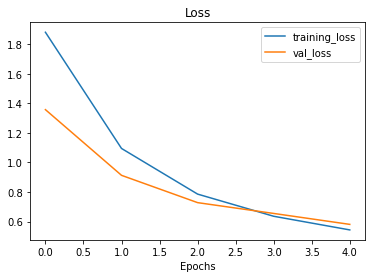

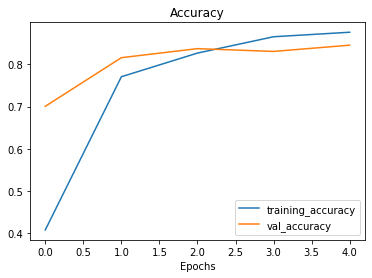

In [23]:
#Check out models training curves
plot_loss_curves(history_0)

## Getting a feature vector from a trained model


Lets demonstatrate the Global average pooling 2D layer...

we have a tensor after our model goes through the base_model of shape(None,7,7,1280).

But then when it passes through the GlobalAVeragePooling2D, it turns into (none,1280).

Lets use a similar shaped tensor of (1,4,4,3) and then pass it to the GlobalAveragePooling2D

In [27]:
#Define the input shape
input_shape =(1,4,4,3)

#Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor \n: {input_tensor} \n')

#Pass the random tensor to GlobalAVeragePooling2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global average pooled random  tensor \n: {global_average_pooled_tensor} \n')

#Check shape of different tensor
print(f'Shape of input tensor: {input_tensor.shape}')
print(f'Shape of Global average pooled 2D tensor: {global_average_pooled_tensor.shape}')

Random input tensor 
: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global average pooled random  tensor 
: [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of input tensor: (1, 4, 4, 3)
Shape of Global average pooled 2D tensor: (1, 3)


In [29]:
#Lets replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor,axis=(1,2))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfer learning experiments

We have seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of trainingg data. How about we set up a bunch of experiments  to find out:
1. 'model_1' - use feature extraction transfer learning with 1% of training data with data augmentation.
2. 'model_2' - use feature extraction transfer learning with 10% of training data with data augmentation
3. 'model_3' - use fine-tuning transfer learning on 10% of the training data with data augmentation.
4. 'model_4' - use fine-tuning transfer learning on 100% of the training data with data augmentation.

### Getting and preprocessing the dat

In [31]:
# download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-01-14 22:31:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 172.253.118.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.5MB/s    in 6.6s    

2023-01-14 22:31:34 (19.2 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [38]:
#Creaye training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir_1_percent = "10_food_classes_1_percent/test/"

In [34]:
#How many images are we working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [39]:
#Setup data loaders
IMG_SIZE=(224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)#default 32


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                label_mode ="categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = BATCH_SIZE)#default 32                                                                 

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right nto the model

To add data augmentation right into the model, we can use the layers inside:
* tf.keras.layers.experimental.preprocessing()

Benefits of using data augmentation:
1. Preprocessing of images happens on GPU (faster) than CPU
2. Image data augmentation only happens during training, so we can still export the whole model and use it elsewhere

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#ceate data augmentation stage with horizontal flipping,rotations,zooms etc

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1/255.) #Keep for models like ResNet50V2 but efficientNetmodel has it default
], name ="data_augmentation")

### Visualise data augmentation layer

(-0.5, 511.5, 511.5, -0.5)

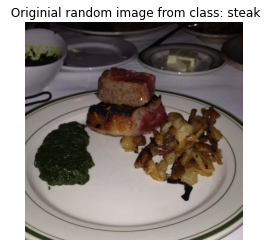

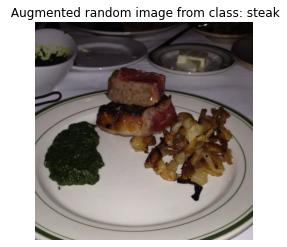

In [47]:
# view a random image and compare it to the augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#Read int the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f" Originial random image from class: {target_class}")
plt.axis(False)

#Now lets plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255)
plt.title(f" Augmented random image from class: {target_class}")
plt.axis(False)

## Model 1 : Feature extraction transfer learning on 1 % of training data with data augmentation

In [50]:
# Setup the imput shape and base model and freezing base model layers
input_shape=(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the input layer
inputs = layers.Input(shape = input_shape, name ="input_layer")

# Add in data augmentation sequential model as layer
x = data_augmentation(inputs)

#Give base model the inputs (after augmentation) and dont train it
x = base_model(x, training = False)

#Pool output features of the base model
x = layers.GlobalAveragePooling2D(name ="global_average_pooling_layer")(x)

#Put a dense layer on as the output
outputs = layers.Dense(10,activation = "softmax", name ="output_layer")(x)

#Make the model with inputs and outputs
model_1 = keras.Model(inputs,outputs)

#Compile the model
model_1.compile(loss ="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 *len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                         experiment_name="1_percent_data_aug")])

                                

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230114-230427
Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 2.4102 - accuracy: 0.1143 - val_loss: 2.2262 - val_accuracy: 0.1924
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.2039 - accuracy: 0.2143 - val_loss: 2.0987 - val_accuracy: 0.2829
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9215 - accuracy: 0.3429 - val_loss: 1.9888 - val_accuracy: 0.3421
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7875 - accuracy: 0.5286 - val_loss: 1.8675 - val_accuracy: 0.4030
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6036 - accuracy: 0.6571 - val_loss: 1.7892 - val_accuracy: 0.4391


In [51]:
#Model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [53]:
#EValuate on full test data set
results_1_percent_data_aug =model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 74ms/step - loss: 1.7771 - accuracy: 0.4624


[1.7771376371383667, 0.46239998936653137]

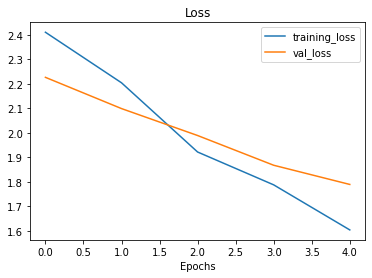

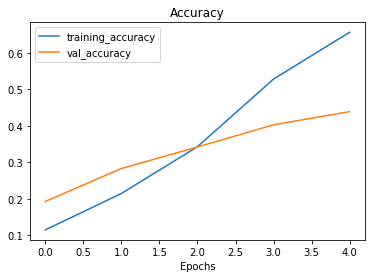

In [54]:
#Loss curves
plot_loss_curves(history_1_percent)

## Model 2: Feature etraction transfer learning on 10% training data with data augmentation

In [57]:
#get the data and we have data downloaded earlier

train_dir_10_percent ="10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [58]:
#Set data inputs
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = "categorical",
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [59]:
#create model 2 with data augmentation built in
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

#Build data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
],name="data_augmentation")

In [62]:
#Setup input shape to our model
input_shape =(224,224,3)

#Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

#Create the inputs and outputs(including layers in between)
inputs = layers.Input(shape = input_shape,name ="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name ="global_average_pooling_2d")(x)

outputs = layers.Dense(10, activation="softmax",name ="output_layer")(x)

model_2 = tf.keras.Model(inputs,outputs)

#Compile the model
model_2.compile(loss ="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

### Creating a model checkpoint callbacks

Model checkpoint callbacks intermediately saves our model during training

In [63]:
#Set checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

#Create a modelcheckpoint callback that saves models weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [64]:
from prompt_toolkit.key_binding.bindings.vi import create_operator_decorator
#Fit the model
initial_epochs=5
history_10_percent_aug = model_2.fit(train_data_10_percent,
                                   epochs = 5,
                                   steps_per_epoch = len(train_data_10_percent),
                                   validation_data = test_data,
                                   validation_steps = int(0.25 * len(test_data)),
                                   callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                            experiment_name = "10_percent_data_aug"),
                                                checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230114-233042
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9629 - accuracy: 0.3880
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 495ms/step - loss: 1.9629 - accuracy: 0.3880 - val_loss: 1.4339 - val_accuracy: 0.6793
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3123 - accuracy: 0.6720
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 414ms/step - loss: 1.3123 - accuracy: 0.6720 - val_loss: 0.9986 - val_accuracy: 0.7845
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9988 - accuracy: 0.7640
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 404ms/step - loss: 0.9988 - accuracy: 0.7640 - val_loss: 0.8164 - val_accuracy: 0.8076
E

In [66]:
results_10_percent_data_aug=model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 6s 73ms/step - loss: 0.6428 - accuracy: 0.8316


[0.6427884697914124, 0.83160001039505]

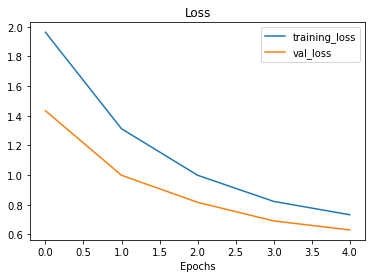

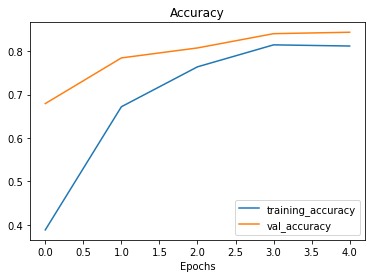

In [67]:
#plot model loss curves
plot_loss_curves(history_10_percent_aug)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint

In [68]:
#Load in daved model weights and evaluate the model
model_2.load_weights(checkpoint_path)

In [69]:
#Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 8s 94ms/step - loss: 0.6428 - accuracy: 0.8316


In [70]:
#If the results from our previously evaluated model_2 match the laoded weights , everything is perfect
results_10_percent_data_aug  == loaded_weights_model_results

True

## Model 3: Fine tuning an existing model on 10% on data with data augmentation



In [71]:
#Layers in loaded model
model_2.layers

In [72]:
#are these layers trainable
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1e84e7f790> True
<keras.engine.sequential.Sequential object at 0x7f1e8461aac0> True
<keras.engine.functional.Functional object at 0x7f1e8435a160> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f1e84539e50> True
<keras.layers.core.dense.Dense object at 0x7f1e849935e0> True


In [74]:
#layers in base model( efficientnetb0) amd are they trainable
for i,layers in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 output_layer True
1 output_layer True
2 output_layer True
3 output_layer True
4 output_layer True
5 output_layer True
6 output_layer True
7 output_layer True
8 output_layer True
9 output_layer True
10 output_layer True
11 output_layer True
12 output_layer True
13 output_layer True
14 output_layer True
15 output_layer True
16 output_layer True
17 output_layer True
18 output_layer True
19 output_layer True
20 output_layer True
21 output_layer True
22 output_layer True
23 output_layer True
24 output_layer True
25 output_layer True
26 output_layer True
27 output_layer True
28 output_layer True
29 output_layer True
30 output_layer True
31 output_layer True
32 output_layer True
33 output_layer True
34 output_layer True
35 output_layer True
36 output_layer True
37 output_layer True
38 output_layer True
39 output_layer True
40 output_layer True
41 output_layer True
42 output_layer True
43 output_layer True
44 output_layer True
45 output_layer True
46 output_layer True
47 output_layer True
48

In [75]:
#How many trainable variables in the base_model
print(len(model_2.layers[2].trainable_variables))

0


In [79]:
# to begin fine tuning lets start by setting last 10 layers of our base_model.trainable = True
base_model.trainable = True


#freeze all layers except for the last 10
for layers in base_model.layers[:-10]:
  layers.trainable = False

#Recompile the model as we made a change
model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),#when fine tuning, we need to lower lr to 10x(best practise)
                metrics=["Accuracy"])



/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [80]:
#check with layers are tunable(trainable)
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [81]:
# unfrozen few layers, and check how many trainable variables
print(len(model_2.trainable_variables))

12


In [86]:
# fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

#refit the model(same as model_2 except more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                   epochs = fine_tune_epochs,
                                   steps_per_epoch = len(train_data_10_percent),
                                   validation_data = test_data,
                                   validation_steps = int(0.25 * len(test_data)),
                                   initial_epoch = history_10_percent_aug.epoch[-1],#starting from last epoch where model_2 left
                                   callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                            experiment_name = "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230114-235715
Epoch 5/10
24/24 [==============================] - 19s 461ms/step - loss: 0.6343 - Accuracy: 0.8187 - val_loss: 0.4885 - val_Accuracy: 0.8602
Epoch 6/10
24/24 [==============================] - 10s 366ms/step - loss: 0.5096 - Accuracy: 0.8467 - val_loss: 0.4611 - val_Accuracy: 0.8536
Epoch 7/10
24/24 [==============================] - 10s 394ms/step - loss: 0.4501 - Accuracy: 0.8707 - val_loss: 0.4465 - val_Accuracy: 0.8438
Epoch 8/10
24/24 [==============================] - 8s 320ms/step - loss: 0.3876 - Accuracy: 0.8800 - val_loss: 0.4454 - val_Accuracy: 0.8520
Epoch 9/10
24/24 [==============================] - 7s 291ms/step - loss: 0.3583 - Accuracy: 0.8960 - val_loss: 0.4136 - val_Accuracy: 0.8602
Epoch 10/10
24/24 [==============================] - 8s 323ms/step - loss: 0.3108 - Accuracy: 0.9147 - val_loss: 0.4176 - val_Accuracy: 0.8586


In [87]:
#Evaluate the fine tuned model
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 7s 74ms/step - loss: 0.4353 - Accuracy: 0.8592


In [90]:
def plot_loss_curves_1(history): #since there is a change in the case of the word Accuracy
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['Accuracy']
  val_accuracy = history.history['val_Accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_Accuracy')
  plt.plot(epochs, val_accuracy, label='val_Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

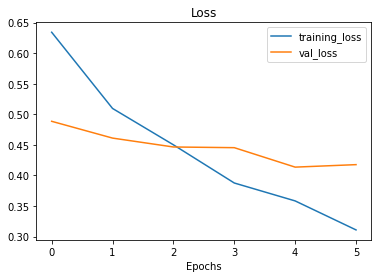

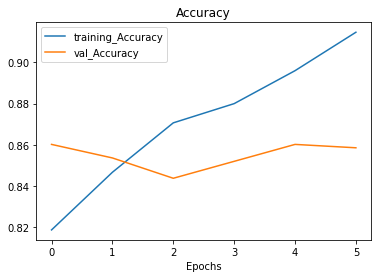

In [91]:
#check loss curve of fine tuned model
plot_loss_curves_1(history_fine_10_percent_data_aug)

PLot_loss_curves works great with models which have been fit once, however we wsant  something to compare on series of running fit() with another

In [120]:
 #Lets create a function to compare traininghistories
 def compare_history(original_history, new_history, epochs=5):
   #Get original history measurements
   acc = original_history.history["accuracy"]
   loss = original_history.history["loss"]

   val_acc = original_history.history["val_accuracy"]
   val_loss = original_history.history["val_loss"]

   #Combine original history metrics with new _history metrics
   total_acc = acc + new_history.history["accuracy"]
   total_loss = loss + new_history.history["loss"]

   total_val_acc = val_acc + new_history.history["val_accuracy"]
   total_val_loss = val_loss + new_history.history["val_loss"]

   #Make plots for accuracy
   plt.figure(figsize=(8,8))
   plt.subplot(2,1,1)
   plt.plot(total_acc, label ="Training Accuracy")
   plt.plot(total_val_acc, label ="Validation Accuracy")
   plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(),label="Start Fine Tuning")
   plt.legend(loc="lower right")
   plt.title("Training and Validation Accuracy")

   #Make plots for loss
   plt.figure(figsize=(8,8))
   plt.subplot(2,1,2)
   plt.plot(total_loss, label ="Training loss")
   plt.plot(total_val_loss, label ="Validation Loss")
   plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(),label="Start Fine Tuning")
   plt.legend(loc="upper right")
   plt.title("Training and Validation Loss")


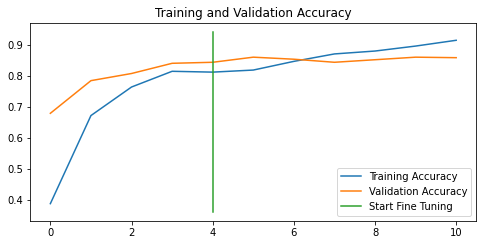

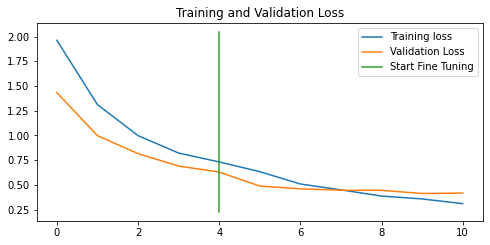

In [99]:
compare_history(history_10_percent_aug,history_fine_10_percent_data_aug,
                epochs=5)

## Model 4: FIne-Tuning existing model with whole data

In [100]:
#Download and unzip all the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-01-15 00:16:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.3MB/s    in 22s     

2023-01-15 00:16:37 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [101]:
#Set up train and test dir
train_dir ="10_food_classes_all_data/train/"
test_dir ="10_food_classes_all_data/test/"

In [102]:
#how many images in each directories
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [105]:
#Setup data inputs
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE) 

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


test data we loaded in is the same as the previous experiments. lets verify this

In [106]:
#Evaluate model 2
model_2.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.4353 - Accuracy: 0.8592


[0.43527016043663025, 0.8592000007629395]

In [107]:
results_fine_tune_10_percent

[0.43527013063430786, 0.8592000007629395]

To train a fine tune model(model 4) we need to revert model 2 back to its feature extraction weights

In [109]:
#Load weights from checkpoint
model_2.load_weights(checkpoint_path)

In [110]:
#Lets evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 8s 93ms/step - loss: 0.6428 - Accuracy: 0.8316


[0.6427884697914124, 0.83160001039505]

In [111]:
#Check to see if our model_2 has reverted back to feature extraction results
results_10_percent_data_aug

[0.6427884697914124, 0.83160001039505]

things we have done till now:

1. trained a feature extraction transfer learning model for 5 epochs on 10% data with data augmentation(model_2) and we saved tthe models weights using modelcheckpoint callback
2. fine tuneed the same model on the same 10% of the data for further 5 more epochs with the top 10 layers of the base model unfrozen(model_3)
3. Saved the results and training logs each time
4. Reloaded the model from step 1 to do the same steps as step 2 except this time its all the data(model_4)

In [112]:
#Check which layers are tunable
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2d True
4 output_layer True


In [113]:
#LEts drill into our base_model and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_3 False
2 normalization_3 False
3 tf.math.truediv_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [116]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [117]:
#Continue to train and fine tune the. model to all data
fine_tune_epochs = initial_epochs+5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = fine_tune_epochs,
                                           validation_data = test_data,
                                           validation_steps= int(0.25 * len(test_data)),
                                           initial_epoch = history_10_percent_aug.epoch[-1],
                                           callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                            experiment_name = "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230115-003553
Epoch 5/10
235/235 [==============================] - 67s 258ms/step - loss: 0.6564 - accuracy: 0.7913 - val_loss: 0.3456 - val_accuracy: 0.8832
Epoch 6/10
235/235 [==============================] - 53s 225ms/step - loss: 0.5227 - accuracy: 0.8335 - val_loss: 0.2830 - val_accuracy: 0.9128
Epoch 7/10
235/235 [==============================] - 49s 205ms/step - loss: 0.4547 - accuracy: 0.8513 - val_loss: 0.2590 - val_accuracy: 0.9112
Epoch 8/10
235/235 [==============================] - 45s 189ms/step - loss: 0.4185 - accuracy: 0.8592 - val_loss: 0.2454 - val_accuracy: 0.9243
Epoch 9/10
235/235 [==============================] - 42s 179ms/step - loss: 0.3754 - accuracy: 0.8797 - val_loss: 0.2513 - val_accuracy: 0.9128
Epoch 10/10
235/235 [==============================] - 44s 185ms/step - loss: 0.3484 - accuracy: 0.8884 - val_loss: 0.2243 - val_accuracy: 0.9276


In [118]:
#Lets evaluate on all of test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 78ms/step - loss: 0.2600 - accuracy: 0.9140


[0.2600250840187073, 0.9139999747276306]

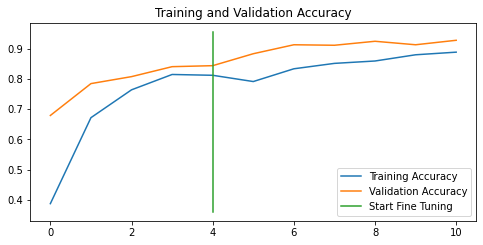

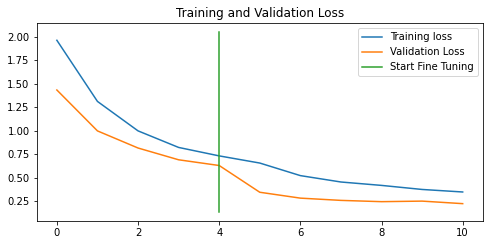

In [121]:
#How did fine tuning go with more data
compare_history(history_10_percent_aug,history_fine_10_classes_full,5)

## Viewing the expriment data on TensorBoard

Tensorboard.dev is public

In [124]:
# View tensorbiard logs of transfer learning modelling experiments(all models)
# upload all the models
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=eSMi0xc4vwLBe9dawEgFsHGOJZp7sZ&prompt=consent&access_type=o